In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


## **The Dataset**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of
284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for
0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortu-
nately, due to confidentiality issues, we cannot provide the original features and more background
information about the data. Features V1, V2, ... V28 are the principal components obtained with
PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. [You
will learn about PCA in a later Lesson.] Feature ‘Time’ contains the seconds elapsed between
each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transac-
tion Amount. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0
otherwise.

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve,precision_recall_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

## **Question 1: /5 pts**
<br>
Read in the creditcard.csv dataset and display the first 5 rows

In [3]:
creditcard_data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Question 2: /5 pts**
<br>
Then split the data into train and test for the outcome/response and the predictor variables. Hold
out 50% of observations as the test set. Pass random_state=0 to train_test_split to ensure you
get the same train and tests sets as the solution.

In [4]:
# Question 2 code here.
X = creditcard_data.drop('Class', axis = 'columns').values
y = creditcard_data.Class.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.5,random_state=0)

## **Question 3: /5 pts**
<br>
Read the documentation for sklearn’s LogisticRegression. In no more than 2 sentences per bullet
point, answer the following in your own words.
<br>
• Does LogisticRegression use a penalty by default? If yes, what penalty?
<br>

**YOUR ANSWER HERE**: LogisticRegression uses L2 penalty by default.
<br>
• If we apply a penalty during learning, what difference do you expect to see in the resulting
coeﬀicients, relative to not applying a penalty during learning?
<br>
**YOUR ANSWER HERE:** Coeﬀicients in the regularization case tend to be smaller in value
than those without regularization.
<br>
• If using the default settings of LogisticRegression in sklearn, should you include a column
of 1s in your feature/design matrix? Briefly explain why or why not.
<br>
**YOUR ANSWER HERE:** No, because the defualt settings sets fit_intercept=True and this
adds self.coef_ to the decision function.

## **Question 4: /15 pts**
Create a instance of sklearn’s LogisticRegression object for unpenalized logistic regression. Note:
If you get a warning about convergence of coef_, try increasing the max_iter parameter. I used
max_iter=10000 which seems to supress the warning.
<br>
Using this object, **run a logisitic regression analysis** of Class (y-variable) against Amount
(x-variable) using your training data.
<br>
Then **make a plot with three main components based on the analysis:** 1. Scatter-plot of
Amount and Outcome on your test data 2. A curve showing the prediction (0 or 1, using predict - this curve will jump between 0 and 1) as a function of Amount 3. A curve showing the predicted
probability of a positive outcome (using predict_proba) as a function of Amount. Note that
predict_proba will return both p(Outcome=0) and p(Outcome=1) in an array.

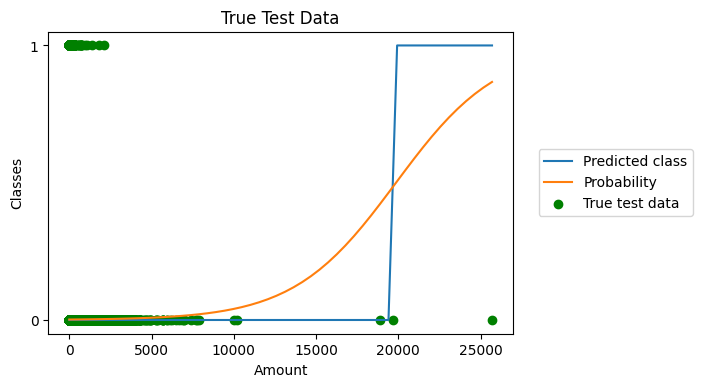

In [5]:
# Question 4 code here
class_amount_LR = LogisticRegression(penalty = 'none', max_iter=10000)
amount_train = Xtrain[:,-1].reshape(-1, 1) #Amount is the last feature of the␣data before the Class and we dropped Class to get Xtrain
class_amount_lr = class_amount_LR.fit(amount_train, ytrain)
#plot
amount_test = Xtest[:,-1].reshape(-1,1)
#True Test Data
fig, ax = plt.subplots(dpi = 100)
ax.scatter(x= amount_test, y= ytest, color="green")
ax.set_title('True Test Data')
ax.set_ylabel('Classes')
ax.set_xlabel('Amount')
ax.set_yticks([0,1])
#Prediction
xp = np.reshape(np.linspace(0,max(amount_test),50),(-1,1))
yp = class_amount_lr.predict(xp)
yp_prop = class_amount_lr.predict_proba(xp)
ax.plot(xp[:,0],yp)
ax.plot(xp[:,0],yp_prop[:,1])
ax.legend(["Predicted class", "Probability", "True test data"],bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()


## **Question 5: 15 pts**
Compute the label-based criteria we discussed in the Lesson for your amount-only classifier using
the test data. Use a threshold of 0.5. Answer the questions in this text box below.
<br>
• How many of the test instances are labeled positive by your classifier?
<br>
**YOUR ANSWER HERE:** Only one.
<br>
• Choose one of the positively-labeled test instances, and explain why the classifier labeled it
positive.
<br>
**YOUR ANSWER HERE:** the one positively-labeled test instance coresponds to amount
25691.16. As most of the data are legit instances and most of them are well below Amount=10000,
the classifier associated high fraud probability with higher amount used. This can be seen by
looking at the Amount’s coeﬀicient in the fit model.

<br>
• Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.
<br>

**YOUR ANSWER HERE:** No, it only labeld one instance as positive and it is wrong. As the
fraud instances are rare in the data, we need more features to better predict them.

In [6]:
# Calculate performance measures from scratch
# TP: true postives
# TN: true negatives
# FP: False positives
# FN: False negatives
def compute_performance(yhat, y, classes):
    
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))
    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    # Print results
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),"Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    ## Put code here to compute criteria:
y_hat_amount = class_amount_lr.predict(amount_test)
compute_performance(y_hat_amount, ytest, [0,1])
## Put code here to compute whatever else you might need to answer the question.
print('-------')
print(f'Amount corresponds to the unique positive labaled instance is{amount_test[y_hat_amount == 1][0][0]}')
print(f'Coefficient of Amount is {class_amount_lr.coef_[0,-1]}') #Amount's␣coefficient

tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0
-------
Amount corresponds to the unique positive labaled instance is25691.16
Coefficient of Amount is 0.00032135622555176316


## **Question 6: /10 pts**
Now fit a logistic regression model to the training data and include all the variables in the data
frame (except for Class) in the cell below. You will want to make a new object like you did for the
simpler model. Answer the following question.
<br>
• According to this more complex model, are larger or smaller Amounts more strongly associ-
ated with fraud, if all other variables are held equal?
<br>
**YOUR ANSWER HERE:** Amount has a negative coeffecient, so the fraud-Amount relation is
inversely proportional. Thus, smaller Amounts are more strongly associated with fraud.

In [7]:
# Code for Question 6
credit_LR = LogisticRegression(penalty = 'none', max_iter=10000)
credit_lr = credit_LR.fit(Xtrain, ytrain) #Xtrain has all feature except for␣Class
print(f'Coefficient of Amount is {credit_lr.coef_[0,-1]}') #Amount's coefficient

Coefficient of Amount is -0.006378670514832115


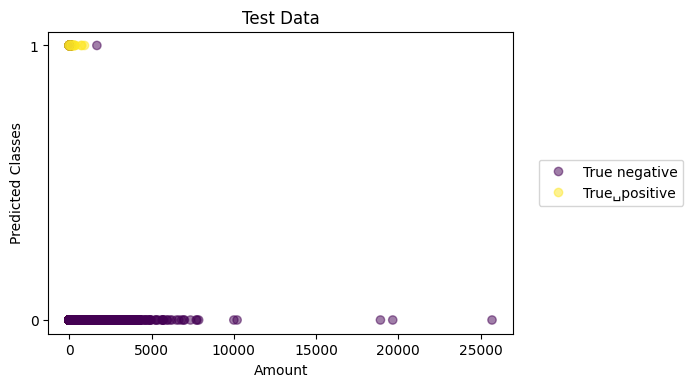

In [8]:
#plot Class against Amount to see if it's getting any better
#True Test Data
amount_test = Xtest[:,-1].reshape(-1,1)
fig, ax = plt.subplots(dpi = 100)
y_hat_all = credit_lr.predict(Xtest)
sct = ax.scatter(x= amount_test, y=y_hat_all, c= ytest, alpha=0.5, label=ytest)
ax.set_title('Test Data')
ax.set_ylabel('Predicted Classes')
ax.set_xlabel('Amount')
ax.set_yticks([0,1])
ax.legend(handles=sct.legend_elements()[0], labels=["True negative", "True␣positive"],
loc="center left", bbox_to_anchor=(1.04,0.5))
plt.show()
# It is better indeed

## **Question 7: /15 pts**
In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier
using the test data. (You don’t have to copy the function down into this cell; just call it again
here.) Use a threshold of 0.5. Answer the questions in this text box below.
<br>
• How many of the test instances are labeled positive by your classifier?
<br>
**YOUR ANSWER:** 146+34 = 180 instances
<br>
• Is this classifier better or worse than the amount-only classifier for finding fraudulent
transactions? Explain in one or two sentences.
<br>
**YOUR ANSWER:** It is better as it predicts 60% of fraud instances with precision 80%, as
opposed to 0% fraud prediction for the amount-only classifier.

In [9]:
# Code for Question 7
compute_performance(y_hat_all, ytest, [0,1])

tp: 154 tn: 142132 fp: 29 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.842 Sensitivity: 0.634 Specificity: 1.0


## **Question 8: /15 pts**
Plot ROC curves for both of your classifiers using the cells below, then answer the following ques-
tions, computing whatever quantities you need to answer them.
<br>
• Which classifier has a higher estimated probability of correctly distinguishing between a
positive and a negative instance? How do you know?
<br>
**YOUR ANSWER:** All-variables classifier because the area under the ROC curve correspons to
the ability of the classifier to correctly distinguishing between a positive and a negative instance.
<br>
• How could you explain a result where a logistic regression classifier produces an AUROC that
is “worse than random”, i.e. less than 0.5, even on its training set?
<br>
**YOUR ANSWER:** This means there is a mistake in the implementation of the classifier, e.g.,
incorrectly labeled positive class.

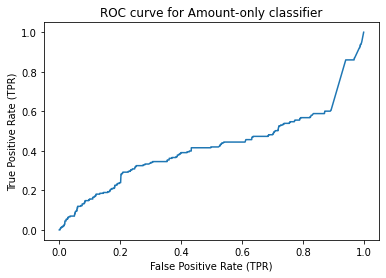

In [10]:
# ROC curve for Amount-only classifier
positive_prop_amount = class_amount_lr.predict_proba(amount_test)[:,1]
fpr1, tpr1, _ = roc_curve(ytest, positive_prop_amount)
ax = sns.lineplot(x=fpr1, y=tpr1)
ax.set_title('ROC curve for Amount-only classifier')
ax.set_xlabel('False Positive Rate (TPR)')
ax.set_ylabel('True Positive Rate (TPR)')
plt.show()

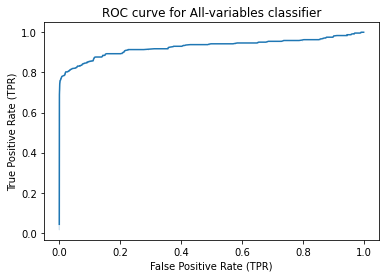

In [11]:
 # ROC for all-variable classifier
positive_prop_all = credit_lr.predict_proba(Xtest)[:,1]
fpr2, tpr2, _ = roc_curve(ytest, positive_prop_all)
ax = sns.lineplot(x=fpr2, y=tpr2)
ax.set_title('ROC curve for All-variables classifier')
ax.set_xlabel('False Positive Rate (TPR)')
ax.set_ylabel('True Positive Rate (TPR)')
plt.show()

## **Question 9: /15 pts**
Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.
<br>
• Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?
<br>
**YOUR ANSWER:** All-variables classifier.

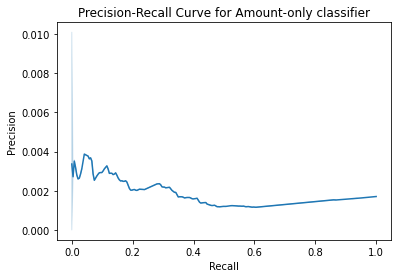

In [12]:
# PRC for Amount-only classifier
precision_amount, recall_amount, _ = precision_recall_curve(ytest,positive_prop_amount)
ax = sns.lineplot(x=recall_amount, y=precision_amount)
ax.set_title('Precision-Recall Curve for Amount-only classifier')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()

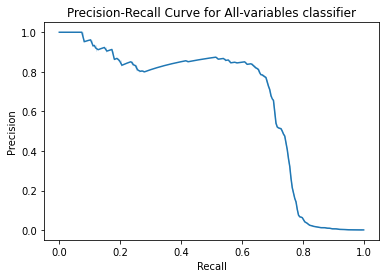

In [13]:
# PRC for all-variable classifier
precision, recall, _ = precision_recall_curve(ytest, positive_prop_all)
ax = sns.lineplot(x=recall, y=precision)
ax.set_title('Precision-Recall Curve for All-variables classifier')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()